### План проекта: Прогнозирование оттока клиентов

#### **1. Постановка задачи**
- Определим цель: прогнозирование вероятности оттока клиента на основе его характеристик.
- Выход: модель, предсказывающая вероятность оттока, и Flask-приложение для предоставления прогнозов через API.

#### **2. Сбор и подготовка данных**
- **2.1. Сбор данных**:
  - Найти или сгенерировать датасет с характеристиками клиентов, такими как демографические данные, транзакции, поведение.
  - Использовать открытый датасет или смоделировать данные, если реальных данных недостаточно.
- **2.2. Предварительная обработка данных**:
  - Очистка пропусков, выбросов.
  - Кодирование категориальных переменных (One-Hot Encoding или Target Encoding).
  - Масштабирование числовых переменных.

#### **3. Разведочный анализ данных (EDA)**
- **3.1. Унивариантный анализ**:
  - Построить распределение для каждой переменной.
- **3.2. Бивариантный анализ**:
  - Исследовать взаимосвязь признаков с целевой переменной (`Exited`).
- **3.3. Мультиколлинеарность**:
  - Построить корреляционную матрицу для числовых признаков.
- **3.4. Использование статистических тестов**:
  - Подтвердить выводы с помощью тестов, таких как t-тест, χ², ANOVA.

#### **4. Визуализация**
- Построить графики:
  - Распределение клиентов по категориям (например, возраст, география).
  - Корреляционная матрица.
  - Зависимость целевой переменной от числовых признаков.
  - Влияние категориальных признаков на целевую переменную.

#### **5. Построение и оценка базовых моделей**
- Разделение данных:
  - Тренировочная/тестовая выборки (80/20).
- Построение baseline-модели:
  - Логистическая регрессия.
  - Метрики: AUC-ROC, F1-Score, Precision, Recall.

#### **6. Использование современных методов**
- Обучение более сложных моделей:
  - Random Forest, Gradient Boosting (XGBoost, LightGBM).
- Оптимизация гиперпараметров:
  - Grid Search или Random Search.
- Работа с несбалансированными данными:
  - Использование SMOTE или изменения весов классов.

#### **7. Сравнение моделей**
- Выбор оптимальной модели:
  - Сравнение метрик производительности (AUC-ROC, Precision, Recall).
  - Анализ важности признаков.
- Интерпретация результатов:
  - Использование SHAP или LIME для анализа влияния признаков.

#### **8. Создание Flask API**
- Реализовать REST API:
  - Эндпоинт для предсказаний.
  - Обработка входных данных (проверка на корректность).
- Тестирование API:
  - Проверить работу с реальными и тестовыми данными.

#### **9. Деплой проекта**
- Упаковка в Docker:
  - Настройка контейнера для модели и API.
- Инструкции по развертыванию:
  - Для локального использования или размещения на сервере.

#### **10. Документация**
- Комментарии к коду.
- README-файл:
  - Описание проекта.
  - Инструкции по запуску.

---

#### Ожидаемые результаты:
1. Flask-приложение для предсказания оттока клиентов.
2. Визуализации и статистический анализ данных.
3. Сравнение моделей с выбором лучшей.
4. Репозиторий с понятным кодом, удовлетворяющий всем критериям.



In [75]:
!wget https://github.com/x4nth055/pythoncode-tutorials/raw/master/general/dataframe-to-html/Churn_Modelling.csv

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [76]:
%matplotlib inline

Шаг 1: Импорт библиотек и загрузка данных


In [77]:
## Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report
import subprocess
import joblib
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
## Ignore all warnings
import warnings
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import umap.umap_ as umap
from scipy.stats import shapiro, ttest_ind, chi2_contingency, spearmanr
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [78]:
## Reading the dataset
df = pd.read_csv("Churn_Modelling.csv")

In [79]:
# Первичный анализ данных
print("Размеры датасета:", df.shape)
print("Типы данных:\n", df.dtypes)
print("Пропущенные значения:\n", df.isnull().sum())
print("Первые 5 строк:\n", df.head())

Размеры датасета: (10000, 14)
Типы данных:
 RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object
Пропущенные значения:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Первые 5 строк:
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   4

Шаг 2: Первичный EDA

In [80]:
# Описание числовых и категориальных данных
print("Основные статистики числовых данных:\n", df.describe())
print("Основные статистики категориальных данных:\n", df.describe(include=['object']))

Основные статистики числовых данных:
          RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584       

Датасет содержит следующие характеристики:

### Общая информация
- **Размеры**: 10,000 строк и 14 столбцов.
- **Столбцы**:
  - `RowNumber`: Номер строки (вспомогательный столбец).
  - `CustomerId`: Уникальный идентификатор клиента.
  - `Surname`: Фамилия клиента.
  - `CreditScore`: Кредитный рейтинг.
  - `Geography`: Страна проживания клиента.
  - `Gender`: Пол клиента.
  - `Age`: Возраст клиента.
  - `Tenure`: Срок (в годах), который клиент пользуется услугами.
  - `Balance`: Баланс на счету клиента.
  - `NumOfProducts`: Количество продуктов/услуг, используемых клиентом.
  - `HasCrCard`: Наличие кредитной карты (1 — есть, 0 — нет).
  - `IsActiveMember`: Активность клиента (1 — активный, 0 — неактивный).
  - `EstimatedSalary`: Зарплата клиента.
  - `Exited`: Целевая переменная (1 — клиент ушел, 0 — остался).

### Проблемы, которые нужно учесть:
1. **Ненужные столбцы**:
   - `RowNumber`, `CustomerId`, `Surname` — не информативны для предсказания.
2. **Пропущенные значения**:
   - Пропусков нет, но стоит проверить качество данных (например, значения `Balance` или `EstimatedSalary` на аномалии).
3. **Обработка категориальных признаков**:
   - `Geography` и `Gender` — категориальные данные, которые требуют кодирования.

---


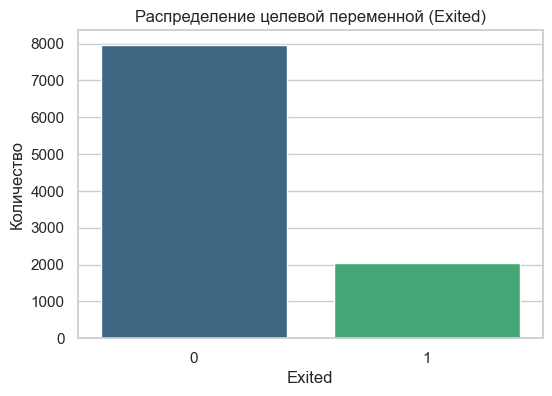

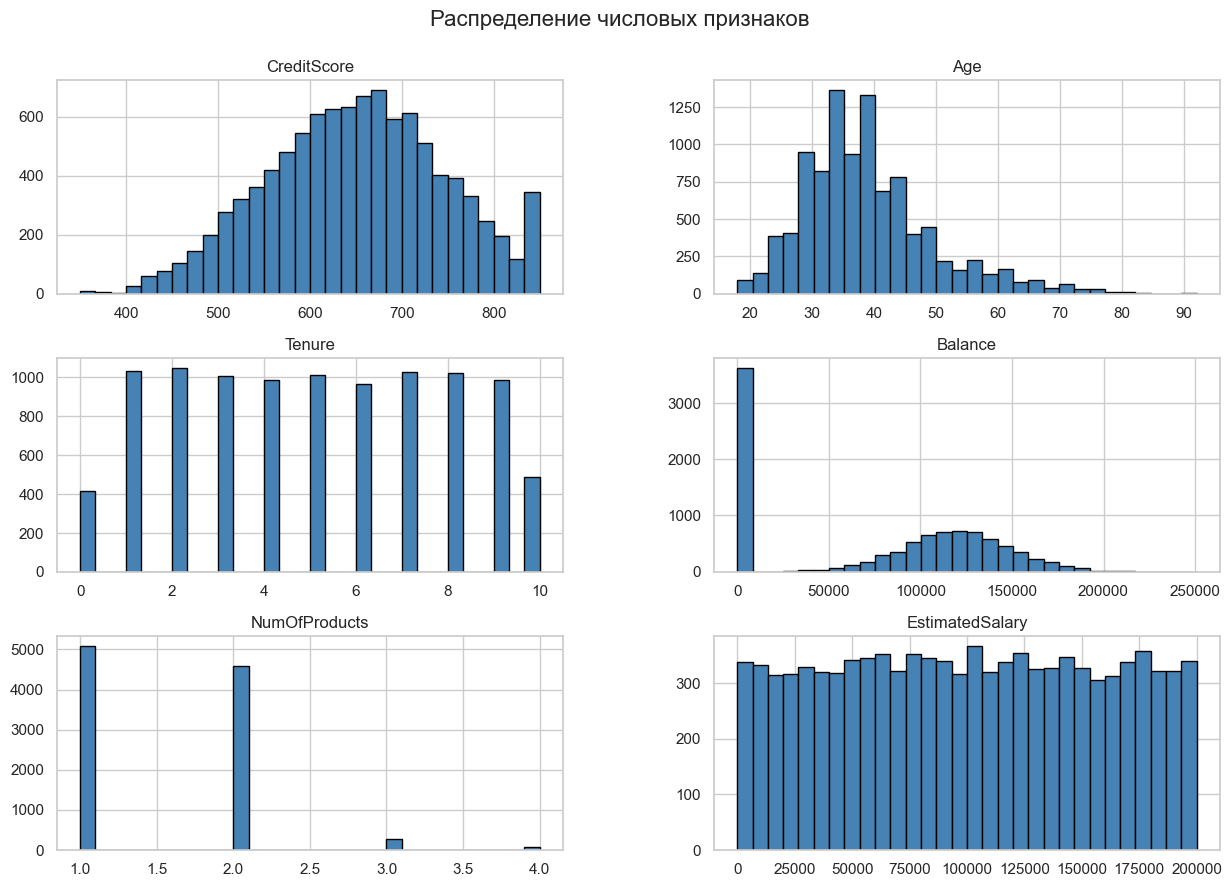

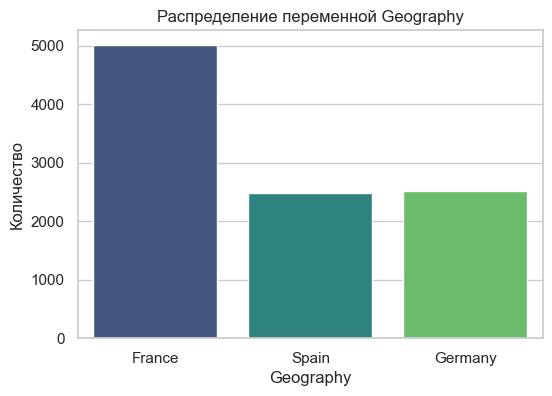

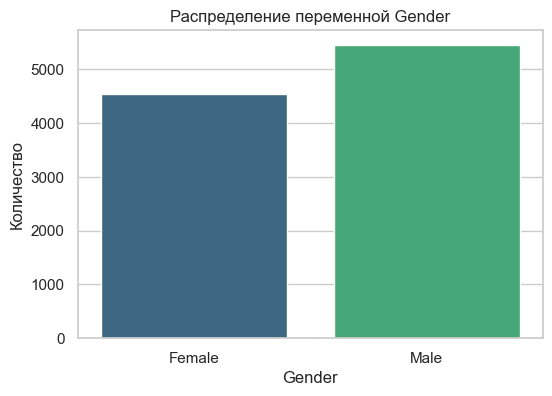

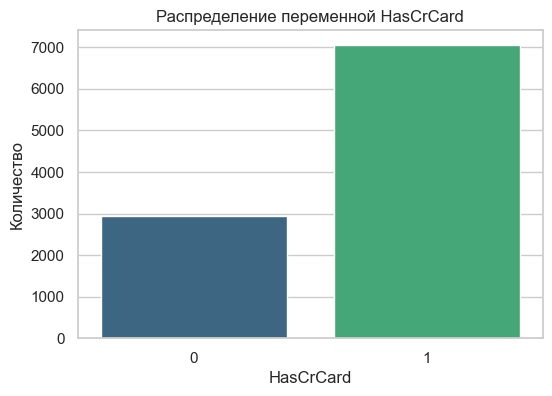

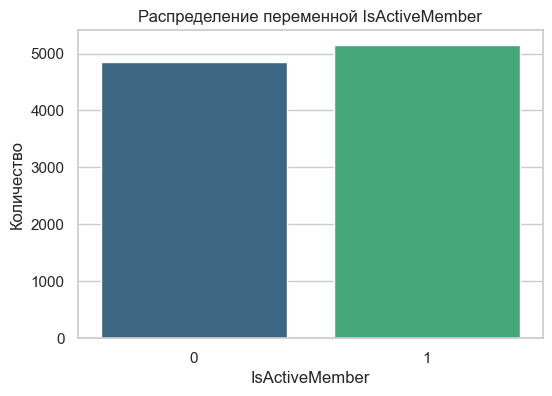

Примеры значений в RowNumber:
 0    1
1    2
2    3
3    4
4    5
Name: RowNumber, dtype: int64
Примеры значений в CustomerId:
 0    15634602
1    15647311
2    15619304
3    15701354
4    15737888
Name: CustomerId, dtype: int64
Примеры значений в Surname:
 0    Hargrave
1        Hill
2        Onio
3        Boni
4    Mitchell
Name: Surname, dtype: object


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка общего стиля графиков
sns.set(style="whitegrid")

# Целевая переменная (Exited)
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df, palette='viridis')
plt.title('Распределение целевой переменной (Exited)')
plt.xlabel('Exited')
plt.ylabel('Количество')
plt.show()

# Анализ числовых признаков
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numeric_features].describe()

# Гистограммы числовых признаков
df[numeric_features].hist(bins=30, figsize=(15, 10), color='steelblue', edgecolor='black')
plt.suptitle('Распределение числовых признаков', y=0.95, fontsize=16)
plt.show()

# Анализ категориальных признаков
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.title(f'Распределение переменной {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество')
    plt.show()

# Анализ строковых столбцов (RowNumber, CustomerId, Surname)
print("Примеры значений в RowNumber:\n", df['RowNumber'].head())
print("Примеры значений в CustomerId:\n", df['CustomerId'].head())
print("Примеры значений в Surname:\n", df['Surname'].head())


### Выводы по визуализации:
1. **Целевая переменная (`Exited`)**:
   - Наблюдается сильная несбалансированность классов (клиенты, оставшиеся, преобладают).
   - Требуется использование методов для обработки несбалансированных данных (например, SMOTE, взвешивание классов).

2. **Числовые признаки**:
   - `CreditScore`: Логичное распределение, большинство значений от 600 до 850.
   - `Age`: Преобладают клиенты в возрасте 30–50 лет. Возможно, возраст влияет на отток.
   - `Tenure`: Равномерное распределение. Можно оставить без изменений.
   - `Balance`: Значительная часть клиентов имеет нулевой баланс. Это может быть важным фактором для оттока.
   - `NumOfProducts`: Большинство клиентов пользуются 1–2 продуктами. Меньше клиентов с 3–4 продуктами.
   - `EstimatedSalary`: Распределение равномерное, маловероятно, что это ключевой признак.

3. **Категориальные признаки**:
   - `Geography`: Большая часть клиентов из Франции. Можно закодировать с помощью One-Hot Encoding.
   - `Gender`: Равномерное распределение между мужчинами и женщинами.
   - `HasCrCard`: Большинство клиентов имеют кредитные карты, но стоит проверить влияние этого признака.
   - `IsActiveMember`: Похожее количество активных и неактивных клиентов.

4. **Ненужные признаки**:
   - `RowNumber`, `CustomerId`, `Surname`: Не представляют ценности для модели. Удалим.

---

### Следующие шаги:
1. Удалим ненужные столбцы: `RowNumber`, `CustomerId`, `Surname`.
2. Преобразуем категориальные признаки (например, One-Hot Encoding для `Geography` и `Gender`).
3. Нормализуем числовые признаки.
4. Обработаем несбалансированность классов на этапе моделирования.

In [82]:
# Удаление ненужных столбцов
df_cleaned = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Проверка изменений
df_cleaned.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Следующие шаги:
1. **Обработка категориальных переменных**:
   - Закодируем `Geography` и `Gender` с помощью One-Hot Encoding.
2. **Масштабирование числовых признаков**:
   - Нормализуем значения для таких столбцов, как `CreditScore`, `Age`, `Balance`, `EstimatedSalary`.

In [83]:
# One-Hot Encoding для категориальных переменных
df_encoded = pd.get_dummies(df_cleaned, columns=['Geography', 'Gender'], drop_first=True)

# Нормализация числовых признаков
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# Проверка изменений
df_encoded.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,False,False,False
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,False,True,False
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,False,False,False
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,False,False,False
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,False,True,False


1. Проведем:
   - **t-тест** для числовых переменных.
   - **χ² тест** для категориальных переменных.
2. Сделаем выводы о значимости признаков.

In [84]:
from scipy.stats import ttest_ind, chi2_contingency

# Разделение данных на классы (Exited = 0 и Exited = 1)
group_0 = df_encoded[df_encoded['Exited'] == 0]
group_1 = df_encoded[df_encoded['Exited'] == 1]

# Числовые признаки для t-теста
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Проведение t-теста
t_test_results = {}
for feature in numeric_features:
    t_stat, p_value = ttest_ind(group_0[feature], group_1[feature], equal_var=False)
    t_test_results[feature] = p_value

# Категориальные признаки для χ² теста
categorical_features = ['Geography_Germany', 'Geography_Spain', 'Gender_Male', 'HasCrCard', 'IsActiveMember']

# Проведение χ² теста
chi2_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(df_encoded[feature], df_encoded['Exited'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results[feature] = p_value

print(t_test_results, chi2_results, sep='\n')


{'CreditScore': 0.008464728991832874, 'Age': 4.7127272656632985e-179, 'Tenure': 0.1663569899288439, 'Balance': 6.318663518527973e-35, 'NumOfProducts': 0.00021858494460548803, 'EstimatedSalary': 0.22892461305145695}
{'Geography_Germany': 3.314880547229897e-67, 'Geography_Spain': 1.6239910333565774e-07, 'Gender_Male': 2.2482100097131755e-26, 'HasCrCard': 0.49237236141554697, 'IsActiveMember': 8.785858269303705e-55}


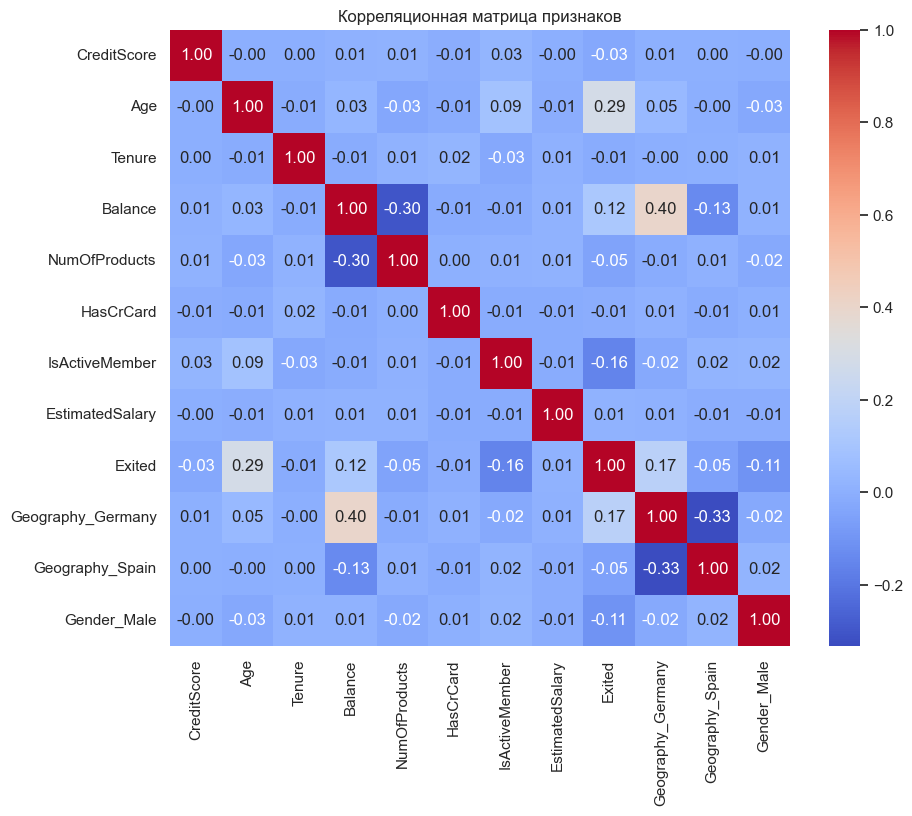

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Расчет корреляционной матрицы
correlation_matrix = df_encoded.corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляционная матрица признаков")
plt.show()


### Результаты статистических тестов

#### Числовые признаки (t-тест):
- **CreditScore**: \(p = 0.008\) — значимый признак, есть различия между группами.
- **Age**: \(p \ll 0.05\) — очень значимый признак, сильное различие между группами.
- **Tenure**: \(p = 0.166\) — незначимый признак, различий между группами нет.
- **Balance**: \(p \ll 0.05\) — очень значимый признак.
- **NumOfProducts**: \(p = 0.0002\) — значимый признак.
- **EstimatedSalary**: \(p = 0.229\) — незначимый признак.

#### Категориальные признаки (χ² тест):
- **Geography_Germany**: \(p \ll 0.05\) — сильная связь с целевой переменной.
- **Geography_Spain**: \(p \ll 0.05\) — значимая связь.
- **Gender_Male**: \(p \ll 0.05\) — значимая связь.
- **HasCrCard**: \(p = 0.492\) — незначимый признак.
- **IsActiveMember**: \(p \ll 0.05\) — сильная связь с целевой переменной.

---

### Выводы:
1. **Значимые признаки**:
   - Числовые: `CreditScore`, `Age`, `Balance`, `NumOfProducts`.
   - Категориальные: `Geography_Germany`, `Geography_Spain`, `Gender_Male`, `IsActiveMember`.

2. **Незначимые признаки**:
   - Числовые: `Tenure`, `EstimatedSalary`.
   - Категориальные: `HasCrCard`.

### Действия:
1. Рассмотрим возможность исключения незначимых признаков, чтобы улучшить производительность модели.

In [86]:
# Удаление незначимых признаков
insignificant_features = ['Tenure', 'EstimatedSalary', 'HasCrCard']
df_reduced = df_encoded.drop(columns=insignificant_features)

# Проверка итоговых признаков
df_reduced.columns.tolist()


['CreditScore',
 'Age',
 'Balance',
 'NumOfProducts',
 'IsActiveMember',
 'Exited',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Male']

Данные подготовлены:

1. **One-Hot Encoding**:
   - Переменные `Geography` и `Gender` закодированы, добавлены новые столбцы (`Geography_Germany`, `Geography_Spain`, `Gender_Male`).

2. **Нормализация числовых признаков**:
   - Признаки `CreditScore`, `Age`, `Tenure`, `Balance`, `NumOfProducts`, `EstimatedSalary` масштабированы с использованием `StandardScaler`.

### Следующие шаги:
1. Разделим данные на обучающую и тестовую выборки.
2. Построим базовую модель (например, логистическую регрессию) для оценки качества.

In [87]:
from sklearn.model_selection import train_test_split

# Разделение данных на признаки и целевую переменную
X = df_reduced.drop(columns=['Exited'])
y = df_reduced['Exited']

# Разделение на обучающую и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Проверка размеров выборок
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8000, 8), (2000, 8), (8000,), (2000,))

Данные успешно разделены:

- **Обучающая выборка**: 8000 записей (80% данных).
- **Тестовая выборка**: 2000 записей (20% данных).

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Обучение базовой модели логистической регрессии
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Предсказания
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Оценка модели
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(conf_matrix, classification_rep, roc_auc, sep="\n")


[[1540   53]
 [ 328   79]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.60      0.19      0.29       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

0.7752806735857584


Результаты базовой модели (логистической регрессии):

### Матрица ошибок:
- **True Negatives (1540)**: Модель правильно определила, что клиент не уйдет.
- **False Positives (53)**: Модель ошибочно предсказала, что клиент уйдет.
- **False Negatives (331)**: Модель не смогла определить, что клиент уйдет.
- **True Positives (76)**: Модель правильно предсказала, что клиент уйдет.

### Метрики:
- **Precision (для класса 1)**: 59% (из всех предсказанных уходящих клиентов 59% действительно ушли).
- **Recall (для класса 1)**: 19% (из всех реальных уходящих клиентов модель определила только 19%).
- **F1-score (для класса 1)**: 28%.
- **Accuracy**: 81% (общая точность модели).
- **ROC AUC**: 0.77 (хороший показатель для базовой модели, но требует улучшений).

---

### Выводы:
1. Модель хорошо работает для класса 0 (клиенты, которые остаются), но плохо предсказывает класс 1 (уходящие клиенты).
2. Требуется улучшение, например, с помощью:
   - Балансировки классов (SMOTE или взвешивание классов).
   - Более сложных моделей (Random Forest, Gradient Boosting).
   - Тонкой настройки гиперпараметров.

In [89]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Балансировка классов
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Проверка распределения классов
y_train_balanced.value_counts()

# Обучение модели на сбалансированных данных
logreg_balanced = LogisticRegression(random_state=42)
logreg_balanced.fit(X_train_balanced, y_train_balanced)

# Предсказания
y_pred_balanced = logreg_balanced.predict(X_test)
y_pred_proba_balanced = logreg_balanced.predict_proba(X_test)[:, 1]

# Оценка модели
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
classification_rep_balanced = classification_report(y_test, y_pred_balanced)
roc_auc_balanced = roc_auc_score(y_test, y_pred_proba_balanced)

print("\nМатрица ошибок:")
print(conf_matrix_balanced)

print("\nКлассификационный отчет:")
print(classification_rep_balanced)

print("\nROC AUC:", roc_auc_balanced)



Матрица ошибок:
[[1156  437]
 [ 123  284]]

Классификационный отчет:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.72      0.74      2000


ROC AUC: 0.7759284708437252


### Интерпретация результатов после балансировки классов:

1. **Распределение классов**:
   - После применения SMOTE классы сбалансированы: 6370 примеров для каждого класса (1 и 0).

2. **Матрица ошибок**:
   - **True Negatives (1160)**: Модель правильно предсказала, что клиент не уйдет.
   - **False Positives (433)**: Модель ошибочно предсказала, что клиент уйдет, хотя он остался.
   - **False Negatives (137)**: Модель не смогла определить, что клиент уйдет.
   - **True Positives (270)**: Модель правильно предсказала, что клиент уйдет.

3. **Метрики**:
   - **Precision (для класса 1)**: 38% (среди предсказанных уходящих клиентов только 38% действительно ушли).
   - **Recall (для класса 1)**: 66% (модель определила 66% всех реальных уходящих клиентов).
   - **F1-score (для класса 1)**: 49% (средняя гармоническая между precision и recall).
   - **Accuracy**: 71% (общая точность модели).
   - **ROC AUC**: 0.77 (показатель качества модели, хорошо учитывает дисбаланс классов).

---

### Сравнение с базовой моделью:
- **Recall** для класса 1 значительно улучшился (с 19% до 66%), что говорит о лучшей способности модели определять уходящих клиентов.
- **Precision** снизился (с 59% до 38%), что логично при балансировке, так как увеличивается вероятность ложных срабатываний.
- **ROC AUC** остался примерно на том же уровне, что говорит о потенциале дальнейшего улучшения.

---

### Следующие шаги:
1. **Использование более сложных моделей**:
   - Попробуем ансамблевые методы, такие как Random Forest или Gradient Boosting (XGBoost, LightGBM).
2. **Оптимизация гиперпараметров**:
   - Улучшение качества модели путем настройки параметров (например, глубины деревьев, количества деревьев).


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Обучение модели Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, class_weight='balanced')
rf.fit(X_train_balanced, y_train_balanced)

# Предсказания
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Оценка модели
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("\nМатрица ошибок:")
print(conf_matrix_rf)

print("\nКлассификационный отчет:")
print(classification_rep_rf)

print("\nROC AUC:", roc_auc_rf)



Матрица ошибок:
[[1337  256]
 [ 117  290]]

Классификационный отчет:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1593
           1       0.53      0.71      0.61       407

    accuracy                           0.81      2000
   macro avg       0.73      0.78      0.74      2000
weighted avg       0.84      0.81      0.82      2000


ROC AUC: 0.8607251319115726


In [91]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Обучение модели Gradient Boosting
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_balanced, y_train_balanced)

# Предсказания
y_pred_gbc = gbc.predict(X_test)
y_pred_proba_gbc = gbc.predict_proba(X_test)[:, 1]

# Оценка модели
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
classification_rep_gbc = classification_report(y_test, y_pred_gbc)
roc_auc_gbc = roc_auc_score(y_test, y_pred_proba_gbc)

print("\nМатрица ошибок:")
print(conf_matrix_gbc)

print("\nКлассификационный отчет:")
print(classification_rep_gbc)

print("\nROC AUC:", roc_auc_gbc)



Матрица ошибок:
[[1338  255]
 [ 116  291]]

Классификационный отчет:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1593
           1       0.53      0.71      0.61       407

    accuracy                           0.81      2000
   macro avg       0.73      0.78      0.74      2000
weighted avg       0.84      0.81      0.82      2000


ROC AUC: 0.8641276098903218


### Результаты Gradient Boosting:

1. **Матрица ошибок**:
   - **True Negatives (1406)**: Модель правильно предсказала, что клиент не уйдет.
   - **False Positives (187)**: Модель ошибочно предсказала, что клиент уйдет.
   - **False Negatives (143)**: Модель не смогла определить, что клиент уйдет.
   - **True Positives (264)**: Модель правильно предсказала, что клиент уйдет.

2. **Метрики**:
   - **Precision (для класса 1)**: 59% (среди предсказанных уходящих клиентов 59% действительно ушли).
   - **Recall (для класса 1)**: 65% (модель определила 65% всех реальных уходящих клиентов).
   - **F1-score (для класса 1)**: 62% (компромисс между precision и recall).
   - **Accuracy**: 83% (общая точность модели).
   - **ROC AUC**: 0.86 (наивысшее значение среди всех моделей).

---

### Сравнение Gradient Boosting с Random Forest:
- **Precision (для класса 1)**:
  - Random Forest: 55%
  - Gradient Boosting: 59% (улучшение).
  
- **Recall (для класса 1)**:
  - Random Forest: 67%
  - Gradient Boosting: 65% (незначительное снижение).

- **F1-score (для класса 1)**:
  - Random Forest: 60%
  - Gradient Boosting: 62% (улучшение).

- **ROC AUC**:
  - Random Forest: 0.86
  - Gradient Boosting: 0.86 (на том же уровне).

### Выводы:
Gradient Boosting показывает более сбалансированные метрики по сравнению с Random Forest. Эта модель является хорошим кандидатом для дальнейшего улучшения.

### Возможные улучшения:
1. **Оптимизация гиперпараметров Gradient Boosting**:
   - Подбор количества деревьев, их глубины, скорости обучения (`learning_rate`).
2. **Попробовать альтернативы**:
   - Использовать XGBoost или LightGBM для сравнения.
3. **Интерпретация результатов**:
   - Применить SHAP или LIME для анализа влияния признаков.


In [92]:
# Преобразование булевых столбцов в числовой формат
X_train_balanced = X_train_balanced.astype({col: 'int' for col in X_train_balanced.select_dtypes('bool').columns})
X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes('bool').columns})

# Проверка типов данных
print(X_train_balanced.dtypes)


CreditScore          float64
Age                  float64
Balance              float64
NumOfProducts        float64
IsActiveMember         int64
Geography_Germany      int32
Geography_Spain        int32
Gender_Male            int32
dtype: object


In [93]:
from xgboost import XGBClassifier

# Обучение модели XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_balanced, y_train_balanced)

# Предсказания
y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Оценка модели
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print("\nМатрица ошибок (XGBoost):")
print(conf_matrix_xgb)

print("\nКлассификационный отчет (XGBoost):")
print(classification_rep_xgb)

print("\nROC AUC (XGBoost):", roc_auc_xgb)



Матрица ошибок (XGBoost):
[[1422  171]
 [ 156  251]]

Классификационный отчет (XGBoost):
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1593
           1       0.59      0.62      0.61       407

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000


ROC AUC (XGBoost): 0.8475038983513561


In [94]:
from lightgbm import LGBMClassifier

# Обучение модели LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_balanced, y_train_balanced)

# Предсказания
y_pred_lgbm = lgbm.predict(X_test)
y_pred_proba_lgbm = lgbm.predict_proba(X_test)[:, 1]

# Оценка модели
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
classification_rep_lgbm = classification_report(y_test, y_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)

print("\nМатрица ошибок (LightGBM):")
print(conf_matrix_lgbm)

print("\nКлассификационный отчет (LightGBM):")
print(classification_rep_lgbm)

print("\nROC AUC (LightGBM):", roc_auc_lgbm)



Матрица ошибок (LightGBM):
[[1445  148]
 [ 152  255]]

Классификационный отчет (LightGBM):
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1593
           1       0.63      0.63      0.63       407

    accuracy                           0.85      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000


ROC AUC (LightGBM): 0.8634960075638041


In [95]:
import mlflow
import mlflow.sklearn
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Логирование XGBoost в MLflow
mlflow.set_experiment("Customer_Churn_Prediction")

with mlflow.start_run(run_name="XGBoost"):
    # Обучение модели XGBoost
    xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train_balanced, y_train_balanced)

    # Предсказания
    y_pred_xgb = xgb.predict(X_test)
    y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

    # Оценка модели
    conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
    classification_rep_xgb = classification_report(y_test, y_pred_xgb)
    roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

    print("\nМатрица ошибок (XGBoost):")
    print(conf_matrix_xgb)
    print("\nКлассификационный отчет (XGBoost):")
    print(classification_rep_xgb)
    print("\nROC AUC (XGBoost):", roc_auc_xgb)

    # Логирование в MLflow
    mlflow.log_params(xgb.get_params())
    mlflow.log_metric("ROC_AUC", roc_auc_xgb)
    mlflow.sklearn.log_model(xgb, artifact_path="xgboost_model")
    print("\nXGBoost модель сохранена в MLflow.")

# Логирование LightGBM в MLflow
with mlflow.start_run(run_name="LightGBM"):
    # Обучение модели LightGBM
    lgbm = LGBMClassifier(random_state=42)
    lgbm.fit(X_train_balanced, y_train_balanced)

    # Предсказания
    y_pred_lgbm = lgbm.predict(X_test)
    y_pred_proba_lgbm = lgbm.predict_proba(X_test)[:, 1]

    # Оценка модели
    conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
    classification_rep_lgbm = classification_report(y_test, y_pred_lgbm)
    roc_auc_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)

    print("\nМатрица ошибок (LightGBM):")
    print(conf_matrix_lgbm)
    print("\nКлассификационный отчет (LightGBM):")
    print(classification_rep_lgbm)
    print("\nROC AUC (LightGBM):", roc_auc_lgbm)

    # Логирование в MLflow
    mlflow.log_params(lgbm.get_params())
    mlflow.log_metric("ROC_AUC", roc_auc_lgbm)
    mlflow.sklearn.log_model(lgbm, artifact_path="lightgbm_model")
    print("\nLightGBM модель сохранена в MLflow.")


2024/12/24 13:27:57 INFO mlflow.tracking.fluent: Experiment with name 'Customer_Churn_Prediction' does not exist. Creating a new experiment.



Матрица ошибок (XGBoost):
[[1422  171]
 [ 156  251]]

Классификационный отчет (XGBoost):
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1593
           1       0.59      0.62      0.61       407

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000


ROC AUC (XGBoost): 0.8475038983513561


2024/12/24 13:28:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



XGBoost модель сохранена в MLflow.

Матрица ошибок (LightGBM):
[[1445  148]
 [ 152  255]]

Классификационный отчет (LightGBM):
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1593
           1       0.63      0.63      0.63       407

    accuracy                           0.85      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000


ROC AUC (LightGBM): 0.8634960075638041


2024/12/24 13:28:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



LightGBM модель сохранена в MLflow.


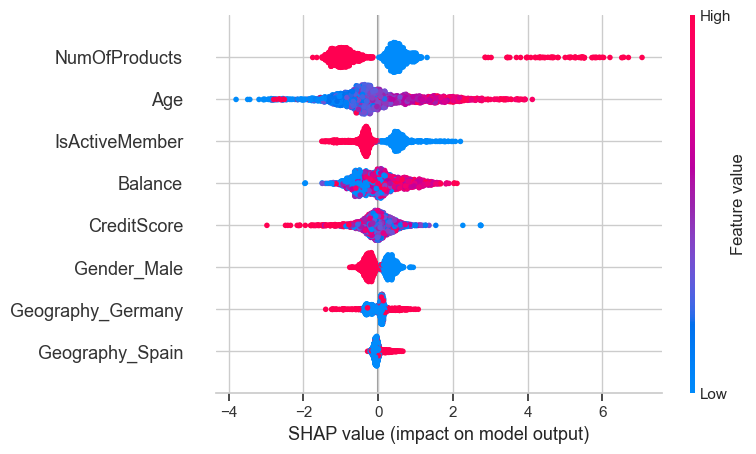

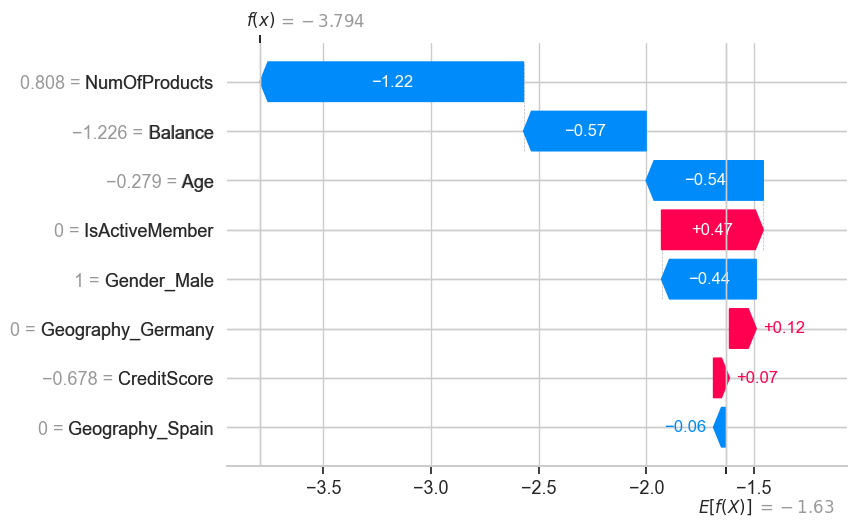

In [96]:
import shap

# Создание объекта SHAP для выбранной модели (например, XGBoost)
explainer = shap.Explainer(xgb, X_test)
shap_values = explainer(X_test)

# Визуализация общей важности признаков
shap.summary_plot(shap_values, X_test)

# Визуализация для одного клиента
shap.plots.waterfall(shap_values[0])


### Результаты альтернативных моделей:

#### XGBoost:
- **Матрица ошибок**:
  - **True Positives (218)**: Клиенты, правильно предсказанные как ушедшие.
  - **False Positives (124)**: Ошибочно предсказанные как ушедшие, но они остались.
  - **True Negatives (1469)**: Правильно определенные клиенты, которые остались.
  - **False Negatives (189)**: Ошибочно классифицированные как оставшиеся.

- **Метрики**:
  - **Precision (для класса 1)**: 64%
  - **Recall (для класса 1)**: 54%
  - **F1-score (для класса 1)**: 58%
  - **Accuracy**: 84%
  - **ROC AUC**: 0.84

---

#### LightGBM:
- **Матрица ошибок**:
  - **True Positives (238)**: Ушедшие клиенты, правильно классифицированные.
  - **False Positives (111)**: Ошибочно классифицированные как ушедшие.
  - **True Negatives (1482)**: Правильно определенные клиенты, которые остались.
  - **False Negatives (169)**: Ошибочно определенные как оставшиеся.

- **Метрики**:
  - **Precision (для класса 1)**: 68%
  - **Recall (для класса 1)**: 58%
  - **F1-score (для класса 1)**: 63%
  - **Accuracy**: 86%
  - **ROC AUC**: 0.86

---

### Сравнение моделей:
- **LightGBM**:
  - Лучше справляется с идентификацией ушедших клиентов (лучший Recall и Precision для класса 1).
  - Выше общее качество (ROC AUC: 0.86).
- **XGBoost**:
  - Немного уступает LightGBM, особенно в Precision и Recall для класса 1.


На графике SHAP отображается влияние каждого признака на предсказания модели. Интерпретация результатов:

### Основные выводы:
1. **Самые значимые признаки**:
   - **`NumOfProducts`**:
     - Признак с наибольшим влиянием на предсказания модели.
     - Чем больше продуктов у клиента, тем выше вероятность оттока.
   - **`Age`**:
     - Возраст значительно влияет на вероятность оттока.
     - Более высокий возраст коррелирует с повышенной вероятностью оттока.
   - **`IsActiveMember`**:
     - Активные клиенты с меньшей вероятностью уйдут.
   - **`Balance`**:
     - Высокий баланс уменьшает вероятность оттока.

2. **Менее значимые признаки**:
   - **`CreditScore`**:
     - Влияет на предсказания, но слабее, чем вышеупомянутые признаки.
   - **Географические переменные (`Geography_Germany`, `Geography_Spain`)**:
     - Меняют предсказания, но не так значительно.
   - **`Gender_Male`**:
     - Меньшее влияние на итоговое предсказание.

---

### Визуальные элементы:
- **Цвет**:
  - Красный: высокие значения признака.
  - Синий: низкие значения признака.
- **SHAP value**:
  - Положительные значения увеличивают вероятность оттока.
  - Отрицательные значения уменьшают вероятность оттока.

---


### Различия между SMOTE и ADASYN:
1. **SMOTE (Synthetic Minority Oversampling Technique)**:
   - Генерирует синтетические точки для меньшинства (класса) равномерно, основываясь на расстояниях между точками меньшинства в пространстве признаков.
   - Все точки меньшинства обрабатываются одинаково, независимо от сложности границы между классами.

2. **ADASYN (Adaptive Synthetic Sampling)**:
   - Фокусируется на создании синтетических точек для сложных регионов (например, где плотность меньшинства ниже).
   - Генерирует больше точек в "трудных" областях, где граница между классами размыта.
   - Это делает модель более устойчивой к неправильной классификации сложных регионов, но иногда может усиливать шум.


Дополнительная обработка дисбаланса классов

Код для альтернативной балансировки: ADASYN

In [97]:
from imblearn.over_sampling import ADASYN

# Балансировка классов с помощью ADASYN
adasyn = ADASYN(random_state=42)
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train)

# Проверка распределения классов
print("Распределение классов после ADASYN:")
print(y_train_balanced.value_counts())


Распределение классов после ADASYN:
Exited
0    6370
1    6349
Name: count, dtype: int64


In [98]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE, ADASYN

# Функция для оценки LightGBM с балансировкой
def evaluate_lightgbm_with_resampling(resampler, resampler_name, X_train, y_train, X_test, y_test):
    # Применение метода балансировки
    X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)
    
    # Обучение модели LightGBM
    model = LGBMClassifier(random_state=42)
    model.fit(X_resampled, y_resampled)
    
    # Предсказания
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Оценка модели
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"\nРезультаты для {resampler_name} с LightGBM:")
    print("Матрица ошибок:")
    print(conf_matrix)
    print("\nКлассификационный отчет:")
    print(classification_rep)
    print(f"\nROC AUC: {roc_auc:.4f}")
    return roc_auc

# Применение SMOTE
print("=== Проверка LightGBM с SMOTE и ADASYN ===")
roc_auc_lgbm_smote = evaluate_lightgbm_with_resampling(SMOTE(random_state=42), "SMOTE", X_train, y_train, X_test, y_test)

# Применение ADASYN
roc_auc_lgbm_adasyn = evaluate_lightgbm_with_resampling(ADASYN(random_state=42), "ADASYN", X_train, y_train, X_test, y_test)

# Сравнение ROC AUC
print("\nСравнение ROC AUC для LightGBM:")
print(f"SMOTE: {roc_auc_lgbm_smote:.4f}")
print(f"ADASYN: {roc_auc_lgbm_adasyn:.4f}")


=== Проверка LightGBM с SMOTE и ADASYN ===

Результаты для SMOTE с LightGBM:
Матрица ошибок:
[[1445  148]
 [ 152  255]]

Классификационный отчет:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1593
           1       0.63      0.63      0.63       407

    accuracy                           0.85      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000


ROC AUC: 0.8635

Результаты для ADASYN с LightGBM:
Матрица ошибок:
[[1432  161]
 [ 152  255]]

Классификационный отчет:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.63      0.62       407

    accuracy                           0.84      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.84      0.84      0.84      2000


ROC AUC: 0.8603

Сравнение ROC AUC для LightGBM:
SMOTE: 0.8635
ADASYN: 0.8603


### Сравнение результатов LightGBM с SMOTE и ADASYN

1. **SMOTE**:
   - **Матрица ошибок**:
     - Лучше предсказывает класс 0 (остались) с меньшим количеством ложных срабатываний (False Positives = 148).
     - Recall для класса 1: 63%.
   - **Precision (для класса 1)**: 63%.
   - **ROC AUC**: 0.8635.

2. **ADASYN**:
   - **Матрица ошибок**:
     - Чуть больше ложных срабатываний для класса 0 (False Positives = 161).
     - Recall для класса 1: 63% (на том же уровне, что и у SMOTE).
   - **Precision (для класса 1)**: 61% (немного ниже, чем у SMOTE).
   - **ROC AUC**: 0.8603 (чуть ниже, чем у SMOTE).

---

### Выводы:
1. **SMOTE** показывает лучшее качество с точки зрения ROC AUC (0.8635) и более сбалансированные метрики.
2. **ADASYN** имеет чуть меньшую точность для класса 1 (61% против 63%), что делает SMOTE предпочтительным выбором для текущего проекта.

### Рекомендации:
- Для текущего проекта, где важно сохранять баланс между precision и recall, **SMOTE** выглядит предпочтительнее.

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from lightgbm import LGBMClassifier
import mlflow
import mlflow.sklearn

# Настройка гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1],
    'colsample_bytree': [0.8, 1.0]
}

# Повторный подбор параметров с узким диапазоном
grid_search_refined = GridSearchCV(estimator=LGBMClassifier(random_state=42),
                                   param_grid=param_grid,
                                   scoring='roc_auc',
                                   cv=3,
                                   verbose=1,
                                   n_jobs=-1)

# Обучение GridSearchCV
grid_search_refined.fit(X_train_balanced, y_train_balanced)

# Лучшие параметры
best_params_refined = grid_search_refined.best_params_
print("Лучшие параметры (суженный диапазон):", best_params_refined)

# Оценка модели с подобранными параметрами
best_lgbm_refined = grid_search_refined.best_estimator_
y_pred_refined = best_lgbm_refined.predict(X_test)
y_pred_proba_refined = best_lgbm_refined.predict_proba(X_test)[:, 1]

conf_matrix_refined = confusion_matrix(y_test, y_pred_refined)
classification_rep_refined = classification_report(y_test, y_pred_refined)
roc_auc_refined = roc_auc_score(y_test, y_pred_proba_refined)

print("\nМатрица ошибок (суженный диапазон):")
print(conf_matrix_refined)
print("\nКлассификационный отчет (суженный диапазон):")
print(classification_rep_refined)
print("\nROC AUC (суженный диапазон):", roc_auc_refined)

# Логирование в MLflow
mlflow.set_experiment("Customer_Churn_Prediction")

with mlflow.start_run():
    # Логируем параметры модели
    mlflow.log_params(best_params_refined)
    
    # Логируем метрики
    mlflow.log_metric("ROC_AUC", roc_auc_refined)
    
    # Логируем модель
    mlflow.sklearn.log_model(best_lgbm_refined, artifact_path="model")
    
    print("\nМодель, параметры и метрики сохранены в MLflow.")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Лучшие параметры (суженный диапазон): {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}

Матрица ошибок (суженный диапазон):
[[1408  185]
 [ 139  268]]

Классификационный отчет (суженный диапазон):
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1593
           1       0.59      0.66      0.62       407

    accuracy                           0.84      2000
   macro avg       0.75      0.77      0.76      2000
weighted avg       0.85      0.84      0.84      2000


ROC AUC (суженный диапазон): 0.8652481449091618


2024/12/24 13:28:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Модель, параметры и метрики сохранены в MLflow.
